In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from pmdarima import auto_arima

In [10]:
# Run the stored data from the Data_Preparation.ipynb
%run ..//Data_Preparation.ipynb


Data types in 'gdp' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object


In [11]:
#Using the period 1990-2019 for training and 2020-2023 for testing
gdp_train = gdp[(gdp['Time'] >= '1990-01-01') & (gdp['Time'] < '2020-01-01')]

gdp_test = gdp[(gdp['Time'] >= '2020-01-01') & (gdp['Time'] < '2024-01-01')]

In [12]:
print(gdp_train)


          Time  Value
0   1990-01-01  210.2
1   1990-04-01  218.1
2   1990-07-01  209.5
3   1990-10-01  217.8
4   1991-01-01  220.2
..         ...    ...
115 2018-10-01  585.2
116 2019-01-01  555.8
117 2019-04-01  583.2
118 2019-07-01  574.4
119 2019-10-01  597.6

[120 rows x 2 columns]


In [13]:
#Resetting the index
gdp_train.reset_index(drop=True, inplace=True)

#Fit auto_arima function to the data
arimax_model = auto_arima(gdp_train['Value'], 
                          start_p=1, start_q=1,
                          max_p=3, max_q=3, 
                          seasonal=False,
                          trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the model
arimax_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=818.127, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=997.679, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=869.547, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=917.729, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1000.663, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=819.998, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=818.089, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=900.845, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=812.889, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=775.668, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=778.577, Time=0.19 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=755.206, Time=0.37 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=795.986, Time=0.23 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=795.047, Time=0.36 sec

Best model:  ARIMA(3,1,3)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -369.603
Date:                Mon, 06 May 2024   AIC                            755.206
Time:                        16:06:50   BIC                            777.439
Sample:                             0   HQIC                           764.234
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.7135      1.870      6.799      0.000       9.049      16.378
ar.L1         -1.0387      0.025    -41.535      0.000      -1.088      -0.990
ar.L2         -1.0193      0.033    -31.166      0.000      -1.083      -0.955
ar.L3         -0.9771      0.025    -39.824      0.000      -1.025      -0.929
ma.L1          0.8979      0.095      9.452      0.000       0.712       1.084
ma.L2          0.8918      0.095      9.378      0.000       0.705       1.078
ma.L3          0.6534      0.086      7.571      0.000       0.484       0.823
sigma2        27.7391      3.332      8.326      0.000      21.209      34.269
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                16.61
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.63
Prob(H) (two-sided):                  0.43   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

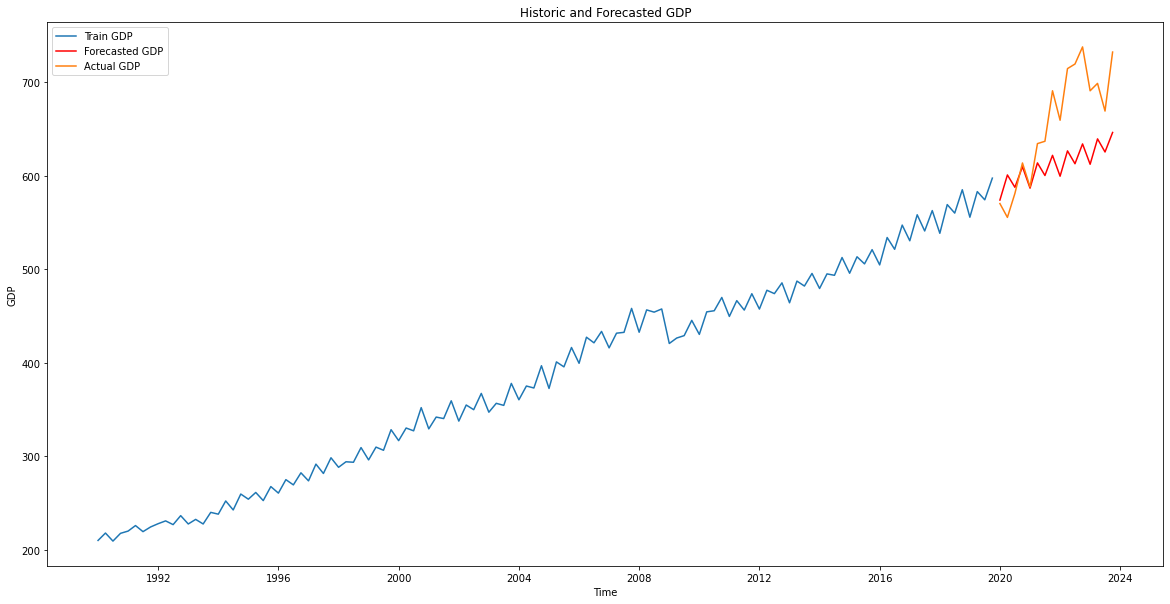

In [14]:
# Forecast the GDP values
forecast = arimax_model.predict(n_periods=16)

# Get the forecasted values
forecast_values = forecast.tolist()

# Plotting historic GDP and forecasted GDP
plt.figure(figsize=(20,10))
plt.plot(gdp_train['Time'].to_numpy(), gdp_train['Value'].to_numpy(), label='Train GDP')
plt.plot(gdp_test['Time'].to_numpy(), forecast_values, color='red', label='Forecasted GDP')
plt.plot(gdp_test['Time'].to_numpy(), gdp_test['Value'].to_numpy(), label='Actual GDP')

# Set the title and labels
plt.title('Historic and Forecasted GDP')
plt.xlabel('Time')
plt.ylabel('GDP')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [15]:
#Comparing the forecasted values with the actual values trough RMSE and MAPE
# Calculate the RMSE
rmse_value = rmse(gdp_test['Value'], forecast_values)
#Calculate the MAPE
mape_value = mean_absolute_percentage_error(gdp_test['Value'], forecast_values) * 100 #Multiplying by 100 to get the percentage

# Print the RMSE
print("The RMSE is", rmse_value)
# Print the MAPE
print("The MAPE is", mape_value)


The RMSE is 61.80483239377497
The MAPE is 7.389131631641938


In [16]:
import os
import json

#Define the evaluation metric name for this model
metric_name = "Multi_UniVar_Post_ARIMAX"

# Create a dictionary with the MAPE value

# Get the current directory
current_dir = os.getcwd()

# Navigate to the directory where mape_values.json is located
json_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..', 'mape_values.json'))

# Check if the file exists and is not empty
if os.path.exists(json_dir) and os.path.getsize(json_dir) > 0:
    # Load the .json file that stores the MAPE results
    with open(json_dir, 'r') as file:
        data = json.load(file)
else:
    data = {}

# Add the MAPE value to the dictionary with a corresponding key
data[metric_name] = mape_value

# Write the MAPE value to the .json file
with open(json_dir, 'w') as file:
    json.dump(data, file, indent=4)

# Create a dictionary with the RMSE value

# Navigate to the directory where rsme_values.json is located
json_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..', 'rsme_values.json'))

# Check if the file exists and is not empty
if os.path.exists(json_dir) and os.path.getsize(json_dir) > 0:
    # Load the .json file that stores the RMSE results
    with open(json_dir, 'r') as file:
        data = json.load(file)
else:
    data = {}

# Add the RMSE value to the dictionary with a corresponding key
data[metric_name] = rmse_value

# Write the RMSE value to the .json file
with open(json_dir, 'w') as file:
    json.dump(data, file, indent=4)